Comparison between new SIMBA spectra and old spectra to address [issue #11](https://github.com/IQcollaboratory/galpopFM/issues/11). __New SIMBA spectra addresses the issue__

In [1]:
import os
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm import dustfm as dustFM
from galpopfm import measure_obs as measureObs
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
dat_dir = os.environ['GALPOPFM_DIR']

Read the new and old SIMBA files 

In [3]:
f_simba_new = h5py.File(os.path.join(dat_dir, 'sed', 'simba.hdf5'), 'r')
f_simba_old = h5py.File(os.path.join(dat_dir, 'sed', '_simba.hdf5'), 'r')

In [6]:
simba_new, simba_old = {}, {}

for _simba, _f_simba in zip([simba_new, simba_old], [f_simba_new, f_simba_old]): 
    _simba['wave'] = _f_simba['wave'][...]
    _simba['sed_neb'] = _f_simba['sed_neb'][...]
    _simba['sed_noneb'] = _f_simba['sed_noneb'][...]
    _simba['sed_onlyneb'] = _simba['sed_neb'] - _simba['sed_noneb']
    _simba['logmstar'] = _f_simba['logmstar'][...]
f_simba_new.close()
f_simba_old.close()

calculate the $H\alpha$ and $H\beta$ directly from the SEDs without any dust 

In [7]:
wlim = (simba_new['wave'] > 4e3) & (simba_new['wave'] < 7e3) 

Ha_new, Hb_new = measureObs.L_em(['halpha', 'hbeta'], simba_new['wave'][wlim], simba_new['sed_neb'][:,wlim]) 
Ha_old, Hb_old = measureObs.L_em(['halpha', 'hbeta'], simba_old['wave'][wlim], simba_old['sed_neb'][:,wlim]) 

In [8]:
HaHb_new = Ha_new / Hb_new
HaHb_old = Ha_old / Hb_old

/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [9]:
HaHb_I = 2.86 # intrinsic balmer ratio 

Now lets read in SDSS measurements for comparison

In [10]:
# read in SDSS measurements 
fsdss = os.path.join(dat_dir, 'obs', 'tinker_SDSS_centrals_M9.7.valueadd.hdf5') 
sdss = h5py.File(fsdss, 'r') 
Haflux_sdss = sdss['HAFLUX'][...]
Hbflux_sdss = sdss['HBFLUX'][...]
Ha_sdss = Haflux_sdss * (4.*np.pi * (sdss['Z'][...] * 2.9979e10/2.2685e-18)**2) * 1e-17
Hb_sdss = Hbflux_sdss * (4.*np.pi * (sdss['Z'][...] * 2.9979e10/2.2685e-18)**2) * 1e-17
HaHb_sdss = Ha_sdss/Hb_sdss 

/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda2/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


Text(0, 0.5, '$\\log H\\alpha$ luminosity')

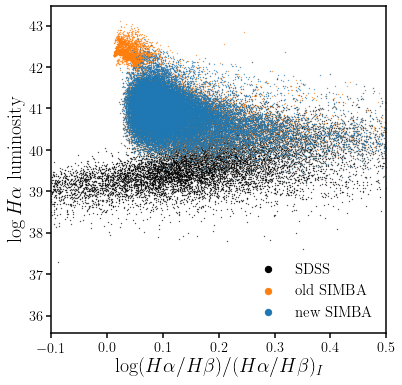

In [15]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(np.log10(HaHb_sdss/HaHb_I), np.log10(Ha_sdss), c='k', s=0.1, label='SDSS')
sub.scatter(np.log10(HaHb_old/HaHb_I), np.log10(Ha_old), c='C1', s=0.1, label='old SIMBA')
sub.scatter(np.log10(HaHb_new/HaHb_I), np.log10(Ha_new), c='C0', s=0.1, label='new SIMBA')
sub.legend(loc='lower right', fontsize=15, markerscale=20) 
sub.set_xlabel(r'$\log (H\alpha/H\beta)/(H\alpha/H\beta)_I$', fontsize=20) 
sub.set_xlim(-0.1, 0.5) 
sub.set_ylabel(r'$\log H\alpha$ luminosity', fontsize=20) 
#sub.set_ylim(0., Ha_sdss[np.isfinite(Ha_sdss)].max())